# Animal Bites #
We will first see what species cause the most amount of bites

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Health_animalBites.csv')
df.head(10)

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN
5,1989-11-24 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40211,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN
6,1990-02-08 00:00:00,DOG,NaN,FEMALE,BLACK/WHIT,1.0,1990-02-13 00:00:00,40203,NO,BODY,1990-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
7,1990-02-22 00:00:00,DOG,NaN,MALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,1990-02-23 00:00:00,RELEASED,NaN,NaN,UNKNOWN
8,1990-08-02 00:00:00,DOG,NaN,MALE,BROWN,NaN,NaN,NaN,NO,BODY,1990-08-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
9,1990-08-19 00:00:00,DOG,NaN,UNKNOWN,BRN-TAN,NaN,NaN,NaN,NO,BODY,1990-08-20 00:00:00,RELEASED,NaN,NaN,UNKNOWN


<AxesSubplot:>

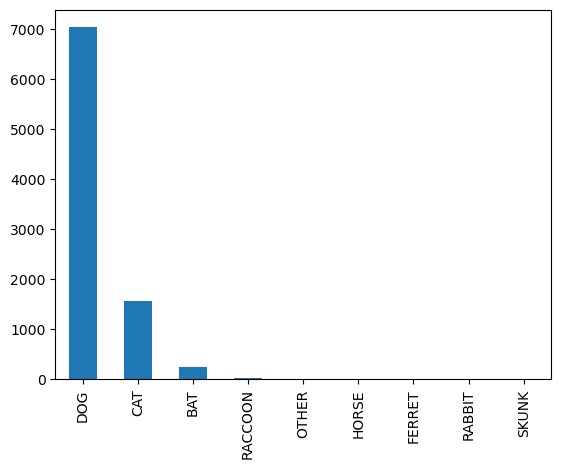

In [86]:
df['SpeciesIDDesc'].value_counts().plot(kind='bar')

it looks like Dogs cause a significant amount of bites than any other animal. We will quickly check the number of rabies recorded and there relation to dogs

In [13]:
#getting dogs only in a new df
df_dogs = (df['SpeciesIDDesc'] == 'DOG')
df_dogs = df[df_dogs].copy()
df_dogs

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,2017-09-05 00:00:00,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
8999,2017-09-07 00:00:00,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
9000,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
9001,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN


In [25]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          6932 non-null   object 
 1   SpeciesIDDesc      7029 non-null   object 
 2   BreedIDDesc        3755 non-null   object 
 3   GenderIDDesc       5372 non-null   object 
 4   color              5340 non-null   object 
 5   vaccination_yrs    3212 non-null   float64
 6   vaccination_date   3544 non-null   object 
 7   victim_zip         5701 non-null   object 
 8   AdvIssuedYNDesc    2024 non-null   object 
 9   WhereBittenIDDesc  6730 non-null   object 
 10  quarantine_date    1645 non-null   object 
 11  DispositionIDDesc  1226 non-null   object 
 12  head_sent_date     105 non-null    object 
 13  release_date       1249 non-null   object 
 14  ResultsIDDesc      1038 non-null   object 
dtypes: float64(1), object(14)
memory usage: 878.6+ KB


There a lot of null values in this dataset we will try to make adjustments where we can.

For example we can see that `vaccination_date` has more information filled out than `vaccination yrs` so we can calculate the years a dog was vaccinated assuming there is a bite_date


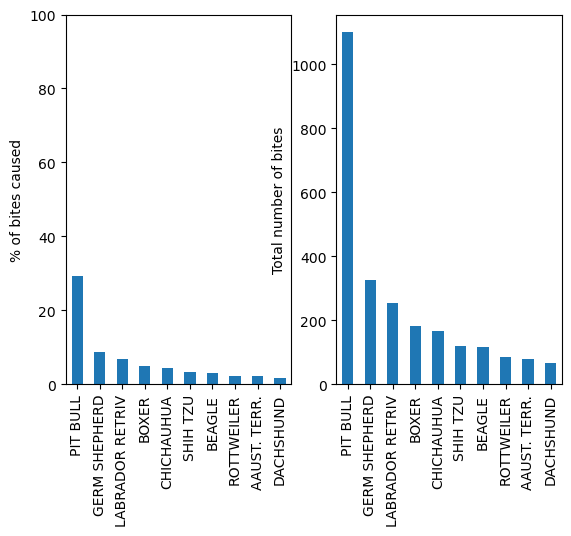

PIT BULL             1101
GERM SHEPHERD         327
LABRADOR RETRIV       253
BOXER                 181
CHICHAUHUA            165
SHIH TZU              119
BEAGLE                115
ROTTWEILER             86
AAUST. TERR.           78
DACHSHUND              67
GOLD RETRIEVER         60
POODLE                 50
BORDER COLLIE          47
YORKSHIRE TERRIER      46
CHOW CHOW              46
GREAT DANE             43
CANE CORSO             40
SCHNAUZER              39
POMERANIAN             38
HUSKY                  34
Name: BreedIDDesc, dtype: int64

In [80]:
breed_count= df_dogs['BreedIDDesc'].value_counts(normalize=True).head(10) * 100

fig, axes = plt.subplots(nrows=1, ncols=2)
breed_count.plot(kind='bar', ylabel='% of bites caused', ylim=(0,100), ax=axes[0])
df_dogs['BreedIDDesc'].value_counts().head(10).plot(kind='bar', ylabel='Total number of bites', ax=axes[1])
plt.show()
df_dogs['BreedIDDesc'].value_counts().head(20)

A significant amount of bites are from pitbulls and the number of bites contiuously get lower as we look at different breeds. we will continue to look at rabies.

In [82]:
df['ResultsIDDesc'].value_counts()

UNKNOWN     1240
NEGATIVE     299
POSITIVE       4
Name: ResultsIDDesc, dtype: int64

There is not enough positive rabies cases in the overall, there is a lot of unknowns, and there are few true negatives. However there is still more than 7000 nan values for rabies so there is no accurate way to grab relevant information of rabies for this dataset

In [89]:
df[df['ResultsIDDesc'] == 'POSITIVE']

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
1418,2015-05-05 00:00:00,BAT,NaN,NaN,NaN,NaN,NaN,40203,NaN,NaN,NaN,NaN,2015-05-05 00:00:00,NaN,POSITIVE
1502,2017-04-29 00:00:00,DOG,GREAT PYRENEESE,FEMALE,WHITE,NaN,NaN,40210,NaN,NaN,NaN,NaN,2017-05-01 00:00:00,NaN,POSITIVE
1677,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40207,NaN,NaN,NaN,NaN,2016-07-10 00:00:00,NaN,POSITIVE
1678,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40214,NaN,NaN,NaN,NaN,2016-07-29 00:00:00,NaN,POSITIVE


most of the positive cases come from bats but there is still not enough data to say that bats are the main cause of rabies.